## 安装相关python包

In [1]:
!pip install openai scipy numpy matplotlib

## 利用GPT-4 生成问题对应pyhton代码

In [2]:
import openai
import os

# 设置 API Key
openai.api_key = os.environ.get('OPENAI_API_KEY') 
# 实现接口函数
def get_completion(prompt, model="gpt-4-0613", temperature=1):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message["content"]

TaskPrompt = """
对于下述advection方程，
∂u/∂t + β ∂u/∂x = 0
其中假设β=0.4,初始条件 u(x, 0) = sin( 2* π * x )
其中x ∈ (0, 1) ， 共1024个网格坐标， t ∈ (0, 2]， 共200个网格坐标，时间间隔为0.01， 在此情况下利用python(可使用scipy库等) ,使用一类有限差分法求解一维平流问题偏微分方程， 并利用matplotlib绘制结果， 用x代表横坐标， t代表纵坐标， 不同颜色的值代表u(x, t)的大小
"""
CoTPrompt = "让我们一步一步地思考上述问题并给出python代码。"
response = get_completion(TaskPrompt + CoTPrompt)
print(response)

这个问题可以通过使用numpy和scipy库来解决，同时使用matplotlib进行绘图。这是一个可能的解决方案：
```
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import time

# 参数设定
dt = 0.01
ini_time = 0.
fin_time = 2.
nx = 1024
xL = 0.
xR = 1.
beta = 0.4

# 网格划分
xe = np.linspace(xL, xR, nx + 1)
xc = xe[:-1] + 0.5 * (xe[1] - xe[0])
# t-coordinate
it_tot = ceil((fin_time - ini_time) / dt) + 1
tc = np.arange(it_tot + 1) * dt

# u值更新
def update(u):
    t = ini_time
    i_save = 0
    tm_ini = time.time()

    it_tot = ceil((fin_time - ini_time)/dt) + 1
    uu = np.zeros([it_tot, u.shape[0]])
    uu[0, :] = u

    while t < fin_time:
        u = set_function(xc, t, beta)
        uu[i_save, :] = u
        t += dt
        i_save += 1

    tm_fin = time.time()
    uu[-1, :] = u
    return uu, t

def set_function(x, t, beta):
    return np.sin(2. * np.pi * (x - beta * t))

u = set_function(xc, t=0, beta=beta)
uu, t = update(u)

# matplotlib绘制结果图
X, T = np.meshgrid(xc, tc[:uu.shape[0]])
plt.figure(figsize=(8, 6))
plt.pc

## 运行生成python代码

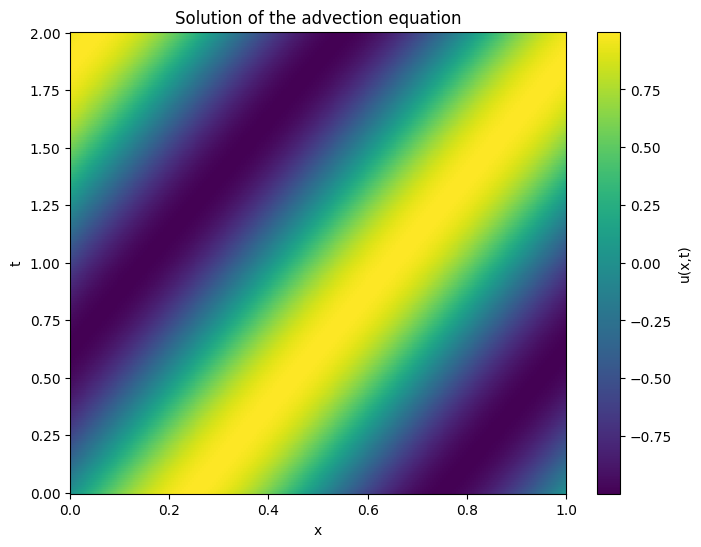

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import time

# 参数设定
dt = 0.01
ini_time = 0.
fin_time = 2.
nx = 1024
xL = 0.
xR = 1.
beta = 0.4

# 网格划分
xe = np.linspace(xL, xR, nx + 1)
xc = xe[:-1] + 0.5 * (xe[1] - xe[0])
# t-coordinate
it_tot = ceil((fin_time - ini_time) / dt) + 1
tc = np.arange(it_tot + 1) * dt

# u值更新
def update(u):
    t = ini_time
    i_save = 0
    tm_ini = time.time()

    it_tot = ceil((fin_time - ini_time)/dt) + 1
    uu = np.zeros([it_tot, u.shape[0]])
    uu[0, :] = u

    while t < fin_time:
        u = set_function(xc, t, beta)
        uu[i_save, :] = u
        t += dt
        i_save += 1

    tm_fin = time.time()
    uu[-1, :] = u
    return uu, t

def set_function(x, t, beta):
    return np.sin(2. * np.pi * (x - beta * t))

u = set_function(xc, t=0, beta=beta)
uu, t = update(u)

# matplotlib绘制结果图
X, T = np.meshgrid(xc, tc[:uu.shape[0]])
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, T, uu, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solution of the advection equation')
plt.show()


## 对比PDE-bench的原始数据

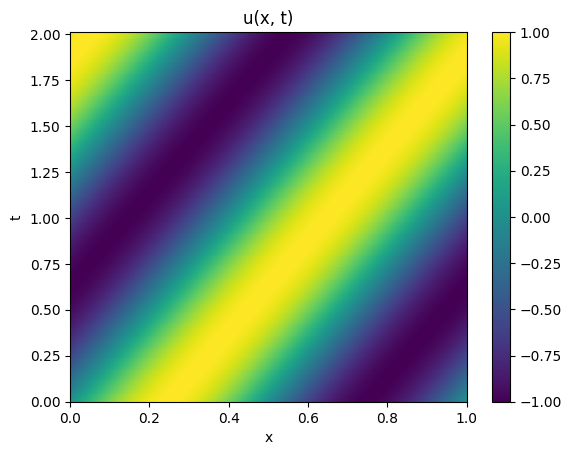

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
advection = np.load('Advection_beta0.4.npy')
x_coordinate = np.load('x_coordinate.npy')  
t_coordinate = np.load('t_coordinate.npy') 

# 创建一个网格
X, T = np.meshgrid(x_coordinate, t_coordinate)

# 创建一个2D图像
fig, ax = plt.subplots()

# 绘制二维数组的图像
c = ax.pcolormesh(X, T, advection, cmap='viridis')

# 添加一个颜色条
fig.colorbar(c, ax=ax)

# 设置x轴和y轴的标签
ax.set_xlabel('x')
ax.set_ylabel('t')

# 设置标题
ax.set_title('u(x, t)')

# 展示图像
plt.show()
